### **Part 1: Data Cleaning**

In [11]:
import pandas as pd
import numpy as np

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/Users/michae14/nba_draft_combine_with_undraft.csv')

In [12]:
# Write a function to convert the measurements to inches
def convert_to_inches(feet_inches_str):
    if pd.isna(feet_inches_str):
        return None
    parts = feet_inches_str.split('\'')
    feet = int(parts[0])
    inches = float(parts[1].replace('"', '').strip())
    total_inches = (feet * 12) + inches
    return total_inches

# Convert and create new columns
df['Height W/O Shoes (inches)'] = df['Height W/o Shoes'].apply(convert_to_inches)
df['Standing Reach (inches)'] = df['Standing Reach'].apply(convert_to_inches)
df['Wingspan (inches)'] = df['Wingspan'].apply(convert_to_inches)

In [13]:
# Count the number of NaN values in each column
na_count = df.isna().sum()

# Print the count of NaN values for each column
print(na_count)

Player                              0
Overall Pick                        0
Draft Class                         0
Lane Agility Time (seconds)         0
Shuttle Run (seconds)               0
Three Quarter Sprint (seconds)      0
Standing Vertical Leap (inches)     0
Max Vertical Leap (inches)          0
Max Bench Press (repetitions)       0
Hand Length (inches)                0
Hand Width (inches)                 0
Height W/o Shoes                   58
Standing Reach                     59
Weight (lbs)                        0
Wingspan                           58
Height W/O Shoes (inches)          58
Standing Reach (inches)            59
Wingspan (inches)                  58
dtype: int64


In [14]:
# Drop rows where 'Wingspan (inches)' is NaN
df = df.dropna(subset=['Standing Reach'])
df = df.dropna(subset=['Wingspan'])

# Count the number of NaN values in each column
na_count = df.isna().sum()

# Print the count of NaN values for each column
print(na_count)

Player                             0
Overall Pick                       0
Draft Class                        0
Lane Agility Time (seconds)        0
Shuttle Run (seconds)              0
Three Quarter Sprint (seconds)     0
Standing Vertical Leap (inches)    0
Max Vertical Leap (inches)         0
Max Bench Press (repetitions)      0
Hand Length (inches)               0
Hand Width (inches)                0
Height W/o Shoes                   0
Standing Reach                     0
Weight (lbs)                       0
Wingspan                           0
Height W/O Shoes (inches)          0
Standing Reach (inches)            0
Wingspan (inches)                  0
dtype: int64


In [16]:
# Select multiple columns using a list
columns_to_select = [
    'Player', 'Draft Class', 'Overall Pick', 'Lane Agility Time (seconds)', 'Shuttle Run (seconds)', 
    'Three Quarter Sprint (seconds)', 'Standing Vertical Leap (inches)', 'Max Vertical Leap (inches)', 
    'Max Bench Press (repetitions)', 'Hand Length (inches)', 'Hand Width (inches)', 
    'Height W/O Shoes (inches)', 'Standing Reach (inches)', 'Weight (lbs)', 'Wingspan (inches)'
]

df_cleaned = df[columns_to_select]
df_cleaned

,Player,Draft Class,Overall Pick,Lane Agility Time (seconds),Shuttle Run (seconds),Three Quarter Sprint (seconds),Standing Vertical Leap (inches),Max Vertical Leap (inches),Max Bench Press (repetitions),Hand Length (inches),Hand Width (inches),Height W/O Shoes (inches),Standing Reach (inches),Weight (lbs),Wingspan (inches)
0,Jamal Crawford,2000,8,-,-,-,-,-,-,-,-,76.50,102.5,175.0,82.00
1,Speedy Claxton,2000,20,10.48,-,3.06,36.0,42.5,6,-,-,70.50,94.5,166.0,72.00
2,Donnell Harvey,2000,22,11.23,-,-,33.0,32.5,15,-,-,79.25,105.5,220.0,84.50
3,Primoz Brezec,2000,27,11.53,-,3.55,26.0,29.5,-,-,-,84.75,110.0,243.0,86.00
4,Mark Madsen,2000,29,12.12,-,3.46,30.5,33.5,13,-,-,80.00,104.5,236.5,84.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,Terrence Shannon Jr.,2023,Undrafted,10.36,-,3.06,32.0,37.5,-,8.25,8.00,77.50,102.0,220.0,80.00
1628,Terquavion Smith,2023,Undrafted,10.86,-,3.21,30.0,37.0,-,8.50,8.00,74.50,98.0,163.2,78.75
1629,Drew Timme,2023,Undrafted,10.93,-,3.34,26.0,30.5,-,9.00,10.00,80.75,108.5,243.2,85.75
1631,Oscar Tshiebwe,2023,Undrafted,12.26,-,3.32,29.5,32.5,-,9.75,10.25,79.25,108.0,253.6,87.50


In [17]:
# Write a function to calculate how many '-' in the dataset
def count_dashes(dataframe):
    dash_counts = {}
    for column in dataframe.columns:
        # Count how many entries in this column are '-'
        count = (dataframe[column] == '-').sum()
        dash_counts[column] = count
    return dash_counts

# Calculate the counts of '-' in each column
count_dashes(df_cleaned)

{'Player': 0,
 'Draft Class': 0,
 'Overall Pick': 0,
 'Lane Agility Time (seconds)': 187,
 'Shuttle Run (seconds)': 1064,
 'Three Quarter Sprint (seconds)': 187,
 'Standing Vertical Leap (inches)': 178,
 'Max Vertical Leap (inches)': 178,
 'Max Bench Press (repetitions)': 518,
 'Hand Length (inches)': 736,
 'Hand Width (inches)': 736,
 'Height W/O Shoes (inches)': 0,
 'Standing Reach (inches)': 0,
 'Weight (lbs)': 2,
 'Wingspan (inches)': 0}

In [18]:
def remove_rows_with_dash_in_columns(dataframe, columns):
    
    # Copy the dataframe to avoid changing the original data
    df = dataframe.copy()
    
    # Loop through the specified columns and remove rows with '-'
    for column in columns:
        df = df[df[column] != '-']
    
    return df

column = ['Hand Length (inches)', 'Hand Width (inches)' ]
df_cleaned1 = remove_rows_with_dash_in_columns(df_cleaned, column)

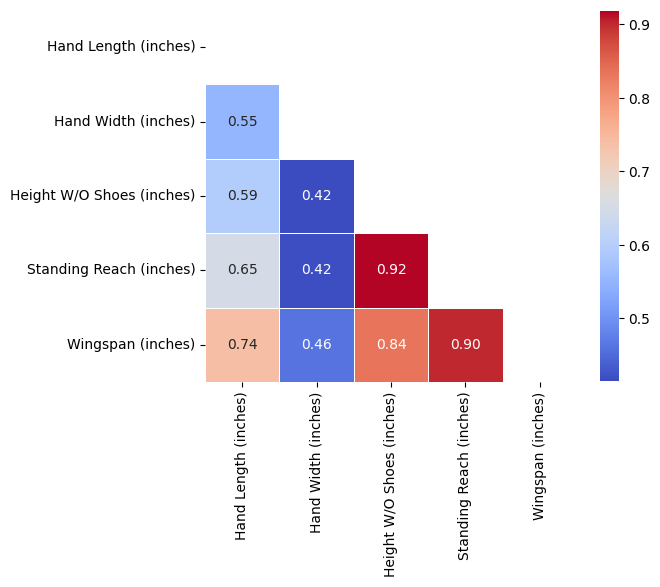

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select specific columns for the correlation matrix
columns_of_interest1 = [
    'Hand Length (inches)',
    'Hand Width (inches)',
    'Height W/O Shoes (inches)',
    'Standing Reach (inches)',
    'Wingspan (inches)'
]

# Create a DataFrame with only the columns of interest
df_cleaned1 = df_cleaned1[columns_of_interest1]

# Compute the correlation matrix
correlation_matrix = df_cleaned1.corr()

# Set up the mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(6, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", square=True, cbar_kws={"shrink": .8})

# Show the plot
plt.show()

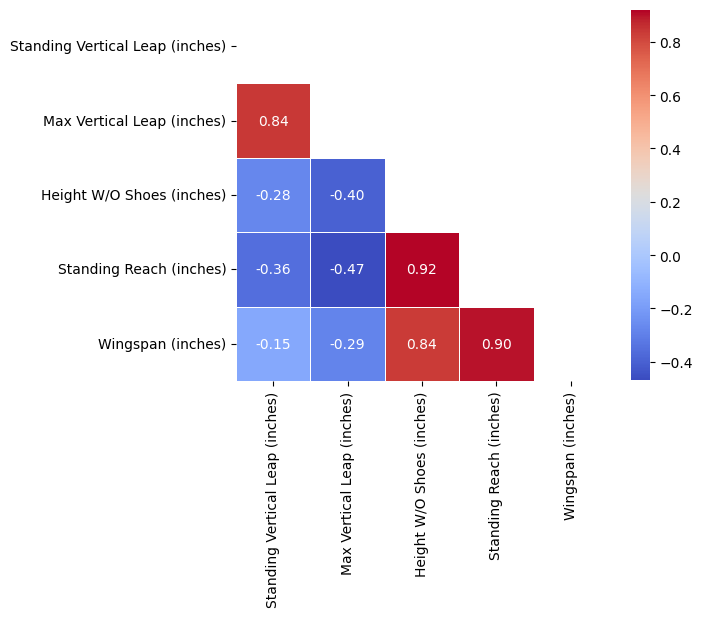

In [20]:
column2 = ['Standing Vertical Leap (inches)', 'Max Vertical Leap (inches)' ]
df_cleaned2 = remove_rows_with_dash_in_columns(df_cleaned, column2)

# Select specific columns for the correlation matrix
columns_of_interest2 = [
    'Standing Vertical Leap (inches)', 'Max Vertical Leap (inches)',
    'Height W/O Shoes (inches)',
    'Standing Reach (inches)',
    'Wingspan (inches)'
]

# Create a DataFrame with only the columns of interest
df_cleaned2 = df_cleaned2[columns_of_interest2]

# Compute the correlation matrix
correlation_matrix2 = df_cleaned2.corr()

# Set up the mask to hide the upper triangle
mask2 = np.triu(np.ones_like(correlation_matrix2, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(6, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix2, mask=mask2, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", square=True, cbar_kws={"shrink": .8})

# Show the plot
plt.show()

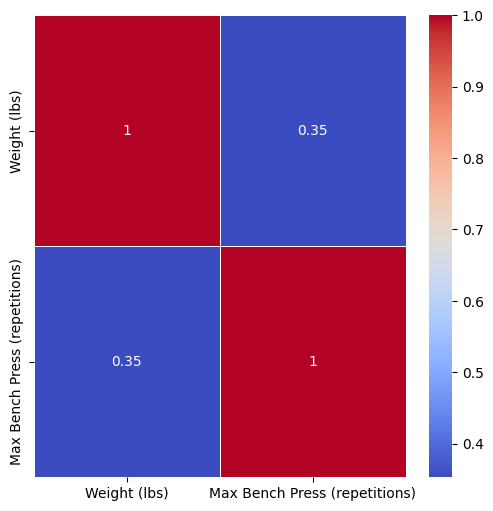

In [21]:
column3 = ['Weight (lbs)', 'Max Bench Press (repetitions)' ]
df_cleaned3 = remove_rows_with_dash_in_columns(df_cleaned, column3)

# Select specific columns for the correlation matrix
columns_of_interest3 = [ 'Weight (lbs)', 'Max Bench Press (repetitions)' ]

# Create a DataFrame with only the columns of interest
df_cleaned3 = df_cleaned3[columns_of_interest3]

# Compute the correlation matrix
correlation_matrix3 = df_cleaned3.corr()

# Set up the matplotlib figure
plt.figure(figsize=(6, 6))

# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.show()

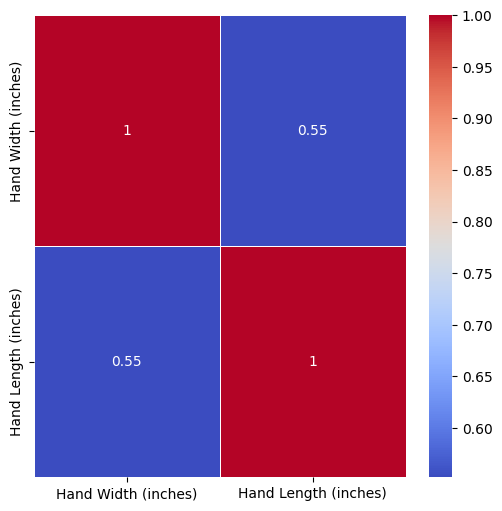

In [22]:
column4 = ['Hand Width (inches)', 'Hand Length (inches)' ]
df_cleaned4 = remove_rows_with_dash_in_columns(df_cleaned, column4)

# Select specific columns for the correlation matrix
columns_of_interest4 = [ 'Hand Width (inches)', 'Hand Length (inches)']

# Create a DataFrame with only the columns of interest
df_cleaned4 = df_cleaned4[columns_of_interest4]

# Compute the correlation matrix
correlation_matrix4 = df_cleaned4.corr()

# Set up the matplotlib figure
plt.figure(figsize=(6, 6))

# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix4, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression

# Convert all '-' to NaN for numerical processing
df_cleaned.replace('-', pd.NA, inplace=True)

# Prepare data for regression
# Remove rows where either variable is missing for fitting the model
df_cleaned1_X_train = df_cleaned1[['Wingspan (inches)']].astype(float)  # Predictor
df_cleaned1_y_train = df_cleaned1['Hand Length (inches)'].astype(float) # Response

# Create and fit the model
model = LinearRegression()
model.fit(df_cleaned1_X_train, df_cleaned1_y_train)

# Impute missing 'Hand Length (inches)' using the model
missing_hand_length = df_cleaned['Hand Length (inches)'].isna()
df_cleaned.loc[missing_hand_length, 'Hand Length (inches)'] = np.round(model.predict(df_cleaned.loc[missing_hand_length, ['Wingspan (inches)']].astype(float)), 2)

/var/folders/1d/38xtg69x6r507pqz8c2q64bm0000gn/T/ipykernel_26453/609131984.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.replace('-', pd.NA, inplace=True)


In [24]:
# Prepare data for regression
# Remove rows where either variable is missing for fitting the model
df_cleaned1_X_train_2 = df_cleaned1[['Hand Length (inches)']].astype(float)  # Predictor
df_cleaned1_y_train_2 = df_cleaned1['Hand Width (inches)'].astype(float) # Response

# Create and fit the model
model2 = LinearRegression()
model2.fit(df_cleaned1_X_train_2, df_cleaned1_y_train_2)

# Impute missing 'Hand Length (inches)' using the model
missing_hand_width = df_cleaned['Hand Width (inches)'].isna()
df_cleaned.loc[missing_hand_width, 'Hand Width (inches)'] = np.round(model2.predict(df_cleaned.loc[missing_hand_width, ['Hand Length (inches)']].astype(float)), 2)

In [31]:
# Count the number of NaN values in each column
na_count = df_cleaned.isna().sum()

# Print the count of NaN values for each column
print(na_count)

Player                             0
Draft Class                        0
Overall Pick                       0
Lane Agility Time (seconds)        0
Shuttle Run (seconds)              0
Three Quarter Sprint (seconds)     0
Standing Vertical Leap (inches)    0
Max Vertical Leap (inches)         0
Max Bench Press (repetitions)      0
Hand Length (inches)               0
Hand Width (inches)                0
Height W/O Shoes (inches)          0
Standing Reach (inches)            0
Weight (lbs)                       0
Wingspan (inches)                  0
dtype: int64


In [26]:
df_cleaned[df_cleaned['Weight (lbs)'].isna()]

,Player,Draft Class,Overall Pick,Lane Agility Time (seconds),Shuttle Run (seconds),Three Quarter Sprint (seconds),Standing Vertical Leap (inches),Max Vertical Leap (inches),Max Bench Press (repetitions),Hand Length (inches),Hand Width (inches),Height W/O Shoes (inches),Standing Reach (inches),Weight (lbs),Wingspan (inches)
584,Kris Dunn,2016,5,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,8.62,9.33,75.0,100.0,<NA>,81.5
699,Romeo Langford,2019,14,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,9.00,9.00,76.5,103.0,<NA>,83.0


In [27]:
df_cleaned.loc[df_cleaned['Player'] == 'Kris Dunn', 'Weight (lbs)'] = 205
df_cleaned.loc[df_cleaned['Player'] == 'Romeo Langford', 'Weight (lbs)'] = 215

In [28]:
# Split the dataset into two parts: one with missing values and one without
df_cleaned_complete = df_cleaned.dropna()  # Rows without missing values

# Define the list of unuseful column names
unuseful_columns = ['Player', 'Overall Pick', 'Draft Class']

# Drop unuseful columns from the DataFrame
df_cleaned_complete = df_cleaned_complete.drop(columns=unuseful_columns)

In [29]:
from sklearn.ensemble import RandomForestRegressor

# Get the list of columns with NaN values
columns_with_na = df_cleaned.columns[df_cleaned.isna().any()].tolist()
X = df_cleaned_complete.drop(columns=columns_with_na)

# Loop through each specified column index from 0 to 5
for column in columns_with_na[:6]:  # Assuming columns_with_na has at least 6 elements
    y = df_cleaned_complete[column]
    
    # Train a Random Forest model on non-missing data for the current column
    model = RandomForestRegressor()
    model.fit(X, y)

    # Predict missing values only for rows where the current column is missing
    df_cleaned_predict = df_cleaned[df_cleaned[column].isna()]
    df_cleaned_predict = df_cleaned_predict[X.columns]
    predicted_values = np.round(model.predict(df_cleaned_predict).astype(float), 2)

    # Find the indices where the current column is NA
    missing_indices = df_cleaned[df_cleaned[column].isna()].index

    # Replace the missing values in the original DataFrame
    df_cleaned.loc[missing_indices, column] = predicted_values

In [33]:
# Resetting the index of the DataFrame
df_cleaned.reset_index(drop=True, inplace=True)
df_final = df_cleaned

df_final['Max Bench Press (repetitions)'] = np.round(df_final['Max Bench Press (repetitions)'].astype(float),0)
df_final

/var/folders/1d/38xtg69x6r507pqz8c2q64bm0000gn/T/ipykernel_26453/653898059.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Max Bench Press (repetitions)'] = np.round(df_final['Max Bench Press (repetitions)'].astype(float),0)


,Player,Draft Class,Overall Pick,Lane Agility Time (seconds),Shuttle Run (seconds),Three Quarter Sprint (seconds),Standing Vertical Leap (inches),Max Vertical Leap (inches),Max Bench Press (repetitions),Hand Length (inches),Hand Width (inches),Height W/O Shoes (inches),Standing Reach (inches),Weight (lbs),Wingspan (inches)
0,Jamal Crawford,2000,8,10.92,3.07,3.17,29.82,36.65,3.0,8.67,9.38,76.50,102.5,175.0,82.00
1,Speedy Claxton,2000,20,10.48,3.08,3.06,36.0,42.5,6.0,7.76,8.62,70.50,94.5,166.0,72.00
2,Donnell Harvey,2000,22,11.23,3.24,3.34,33.0,32.5,15.0,8.9,9.57,79.25,105.5,220.0,84.50
3,Primoz Brezec,2000,27,11.53,3.22,3.55,26.0,29.5,9.0,9.03,9.67,84.75,110.0,243.0,86.00
4,Mark Madsen,2000,29,12.12,3.23,3.46,30.5,33.5,13.0,8.9,9.57,80.00,104.5,236.5,84.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Terrence Shannon Jr.,2023,Undrafted,10.36,3.22,3.06,32.0,37.5,10.0,8.25,8.00,77.50,102.0,220.0,80.00
1569,Terquavion Smith,2023,Undrafted,10.86,3.09,3.21,30.0,37.0,4.0,8.50,8.00,74.50,98.0,163.2,78.75
1570,Drew Timme,2023,Undrafted,10.93,3.17,3.34,26.0,30.5,9.0,9.00,10.00,80.75,108.5,243.2,85.75
1571,Oscar Tshiebwe,2023,Undrafted,12.26,3.32,3.32,29.5,32.5,11.0,9.75,10.25,79.25,108.0,253.6,87.50


### **Part 2: Develop the Tree Model**
1. Decision Tree

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Define the list of unuseful column names
unuseful_columns = ['Player', 'Draft Class']

# Drop unuseful columns from the DataFrame
df_predict = df_final.drop(columns=unuseful_columns)

# Separate features (X) and target variable (y)
X = df_predict.drop(columns=['Overall Pick'])  # Features
y = df['Overall Pick']  # Target variable

In [35]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

In [36]:
# Initialize DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Train the model
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

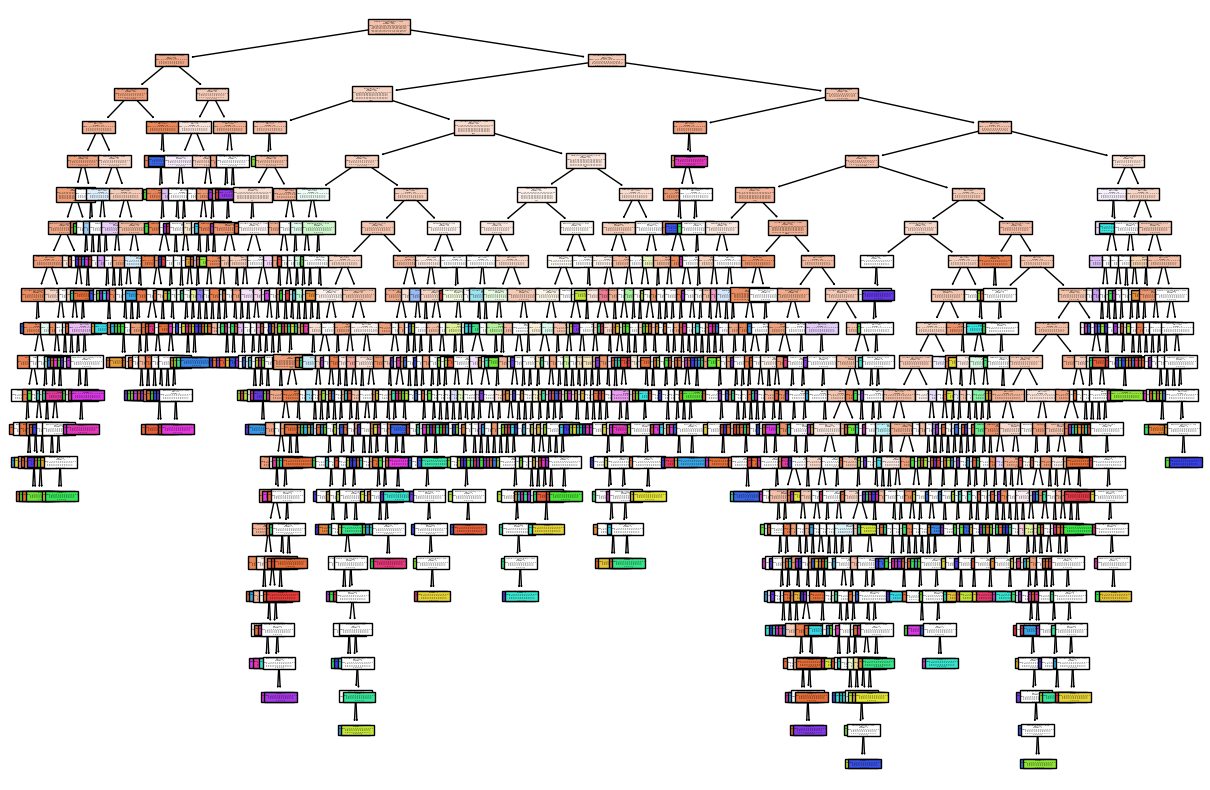

In [37]:
# Visualize Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, feature_names=X.columns, filled=True)
plt.show()

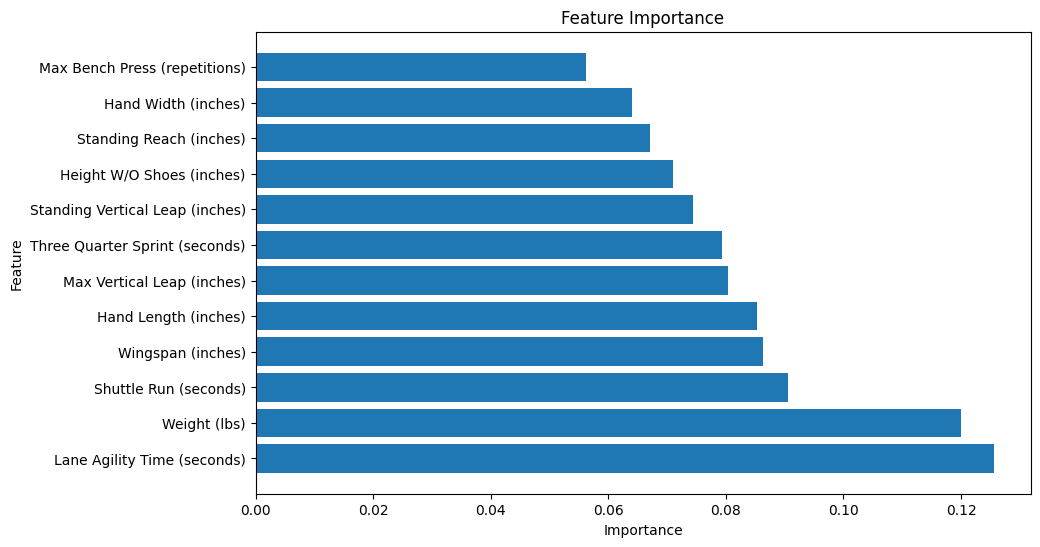

In [38]:
# Extract feature importance
feature_importance = dt_classifier.feature_importances_

# Create a DataFrame to visualize feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [39]:
# Predict on test data
y_pred = dt_classifier.predict(X_test)

predict = pd.DataFrame({'Actual_Draft': y_test, 'Predicted_Draft': y_pred})
predict

,Actual_Draft,Predicted_Draft
1581,Undrafted,46
1513,Undrafted,Undrafted
508,56,Undrafted
739,22,35
1511,Undrafted,50
...,...,...
1493,Undrafted,21
1182,Undrafted,9
467,59,29
294,57,4


In [40]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.21904761904761905


2. Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=14)  # You can adjust the number of trees (n_estimators) as needed

In [42]:
# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on Test Data
y_pred_rf = rf_classifier.predict(X_test)

predict2 = pd.DataFrame({'Actual_Draft': y_test, 'Predicted_Draft': y_pred_rf})
predict2

,Actual_Draft,Predicted_Draft
1581,Undrafted,Undrafted
1513,Undrafted,Undrafted
508,56,Undrafted
739,22,Undrafted
1511,Undrafted,Undrafted
...,...,...
1493,Undrafted,Undrafted
1182,Undrafted,Undrafted
467,59,Undrafted
294,57,Undrafted


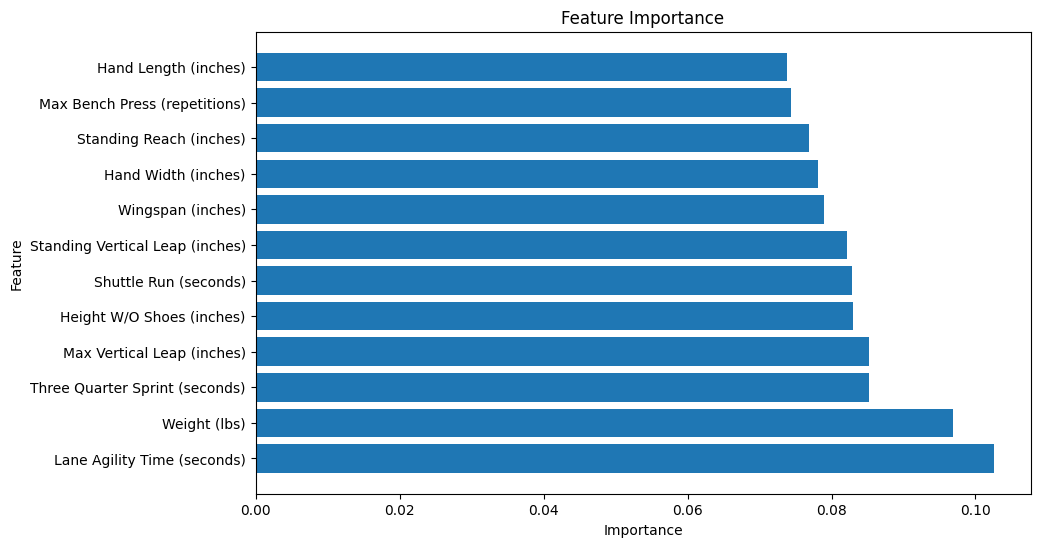

In [44]:
# Extract feature importance
feature_importance = rf_classifier.feature_importances_

# Create a DataFrame to visualize feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [43]:
# Evaluate Model Performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.49206349206349204


### **Part 3: Data Cleaning for Predict Dataset**

In [45]:
# Read the CSV file into a pandas DataFrame
draft_2024_df = pd.read_csv('/Users/michae14/nba_draft_combine_2024.csv')

In [46]:
# Convert and create new columns
draft_2024_df['Height W/O Shoes (inches)'] = draft_2024_df['Height W/o Shoes'].apply(convert_to_inches)
draft_2024_df['Standing Reach (inches)'] = draft_2024_df['Standing Reach'].apply(convert_to_inches)
draft_2024_df['Wingspan (inches)'] = draft_2024_df['Wingspan'].apply(convert_to_inches)

In [47]:
# Select multiple columns using a list
columns_to_select = [
    'Player', 'Draft Class', 'Lane Agility Time (seconds)', 'Shuttle Run (seconds)', 
    'Three Quarter Sprint (seconds)', 'Standing Vertical Leap (inches)', 'Max Vertical Leap (inches)', 
    'Max Bench Press (repetitions)', 'Hand Length (inches)', 'Hand Width (inches)', 
    'Height W/O Shoes (inches)', 'Standing Reach (inches)', 'Weight (lbs)', 'Wingspan (inches)'
]

draft_2024_df = draft_2024_df[columns_to_select]

In [48]:
# Convert all '-' to NaN for numerical processing
draft_2024_df.replace('-', pd.NA, inplace=True)
draft_2024_df

,Player,Draft Class,Lane Agility Time (seconds),Shuttle Run (seconds),Three Quarter Sprint (seconds),Standing Vertical Leap (inches),Max Vertical Leap (inches),Max Bench Press (repetitions),Hand Length (inches),Hand Width (inches),Height W/O Shoes (inches),Standing Reach (inches),Weight (lbs),Wingspan (inches)
0,Michael Ajayi,2024,11.77,3.17,3.21,27.0,34.5,<NA>,9.50,9.75,77.75,106.5,227.8,84.75
1,Trey Alexander,2024,11.37,2.92,3.21,26.5,32.0,<NA>,8.75,10.00,75.25,101.5,187.0,82.50
2,Izan Almansa,2024,10.94,2.96,3.11,28.0,35.0,<NA>,9.25,9.25,81.25,110.0,219.6,85.00
3,Reece Beekman,2024,10.86,3.08,2.94,30.0,36.5,<NA>,8.50,9.00,73.25,100.0,196.4,78.50
4,Adem Bona,2024,11.01,3.01,3.15,35.0,40.0,<NA>,9.50,10.00,80.25,108.0,243.2,87.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Ja'Kobe Walter,2024,11.00,2.92,3.04,30.5,38.5,<NA>,8.75,9.75,76.25,102.5,197.6,82.00
73,Kel'el Ware,2024,10.97,2.91,3.29,32.5,36.0,<NA>,9.50,10.25,83.75,112.5,230.0,88.50
74,Jamir Watkins,2024,10.64,3.16,3.01,30.5,35.5,<NA>,9.00,9.50,77.00,104.0,211.6,82.75
75,Jaylen Wells,2024,11.28,3.03,3.08,27.5,36.0,<NA>,8.25,9.25,78.50,103.5,206.2,79.25


In [49]:
# Count the number of NaN values in each column
na_count = draft_2024_df.isna().sum()

# Print the count of NaN values for each column
print(na_count)

Player                              0
Draft Class                         0
Lane Agility Time (seconds)         5
Shuttle Run (seconds)               6
Three Quarter Sprint (seconds)      5
Standing Vertical Leap (inches)     5
Max Vertical Leap (inches)          5
Max Bench Press (repetitions)      77
Hand Length (inches)                0
Hand Width (inches)                 0
Height W/O Shoes (inches)           0
Standing Reach (inches)             0
Weight (lbs)                        0
Wingspan (inches)                   0
dtype: int64


In [50]:
# Specify the columns where NA values should lead to row being dropped
na_columns = [
    'Lane Agility Time (seconds)',
    'Shuttle Run (seconds)',
    'Three Quarter Sprint (seconds)',
    'Standing Vertical Leap (inches)',
    'Max Vertical Leap (inches)'
]

# Drop rows with any NA values in the specified columns
draft_2024_df_cleaned = draft_2024_df.dropna(subset=na_columns)

In [51]:
X = df_cleaned_complete.drop(columns=['Max Bench Press (repetitions)'])
y = df_cleaned_complete['Max Bench Press (repetitions)']
    
# Train a Random Forest model on non-missing data for the current column
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Predict missing values only for rows where the current column is missing
draft_2024_df_predict = draft_2024_df_cleaned.drop(columns=['Max Bench Press (repetitions)', 'Draft Class', 'Player'])
predicted_values = np.round(rf_model.predict(draft_2024_df_predict).astype(float), 0)

# Find the indices where the current column is NA
missing_indices = draft_2024_df_cleaned.index

# Replace the missing values in the original DataFrame
draft_2024_df.loc[missing_indices, 'Max Bench Press (repetitions)'] = predicted_values

In [52]:
# Split the dataset into two parts: one with missing values and one without
draft_2024_df_complete = draft_2024_df.dropna()  # Rows without missing values

# Define the list of unuseful column names
unuseful_columns = ['Player', 'Draft Class']

# Drop unuseful columns from the DataFrame
draft_2024_df_complete = draft_2024_df_complete.drop(columns=unuseful_columns)

# Get the list of columns with NaN values
columns_with_na = draft_2024_df.columns[draft_2024_df.isna().any()].tolist()
X = df_cleaned_complete.drop(columns=columns_with_na)

# Loop through each specified column index from 0 to 5
for column in columns_with_na[:6]:  # Assuming columns_with_na has at least 5 elements
    y = df_cleaned_complete[column]
    
    # Train a Random Forest model on non-missing data for the current column
    rf_model = RandomForestRegressor()
    rf_model.fit(X, y)

    # Predict missing values only for rows where the current column is missing
    draft_2024_df_predict = draft_2024_df[draft_2024_df[column].isna()]
    draft_2024_df_predict = draft_2024_df_predict[X.columns]
    predicted_values = np.round(rf_model.predict(draft_2024_df_predict).astype(float), 2)

    # Find the indices where the current column is NA
    missing_indices = draft_2024_df[draft_2024_df[column].isna()].index

    # Replace the missing values in the original DataFrame
    draft_2024_df.loc[missing_indices, column] = predicted_values

In [53]:
# Check the data type
print(draft_2024_df.dtypes)

Player                              object
Draft Class                          int64
Lane Agility Time (seconds)         object
Shuttle Run (seconds)               object
Three Quarter Sprint (seconds)      object
Standing Vertical Leap (inches)     object
Max Vertical Leap (inches)          object
Max Bench Press (repetitions)       object
Hand Length (inches)               float64
Hand Width (inches)                float64
Height W/O Shoes (inches)          float64
Standing Reach (inches)            float64
Weight (lbs)                       float64
Wingspan (inches)                  float64
dtype: object


In [54]:
draft_2024_df['Lane Agility Time (seconds)'] = draft_2024_df[['Lane Agility Time (seconds)']].astype(float) 
draft_2024_df['Shuttle Run (seconds)'] = draft_2024_df[['Shuttle Run (seconds)']].astype(float) 
draft_2024_df['Three Quarter Sprint (seconds)'] = draft_2024_df[['Three Quarter Sprint (seconds)']].astype(float) 
draft_2024_df['Standing Vertical Leap (inches)'] = draft_2024_df[['Standing Vertical Leap (inches)']].astype(float) 
draft_2024_df['Max Vertical Leap (inches)'] = draft_2024_df[['Max Vertical Leap (inches)']].astype(float) 
draft_2024_df['Max Bench Press (repetitions)'] = draft_2024_df[['Max Bench Press (repetitions)']].astype(float) 

In [55]:
draft_2024_df

,Player,Draft Class,Lane Agility Time (seconds),Shuttle Run (seconds),Three Quarter Sprint (seconds),Standing Vertical Leap (inches),Max Vertical Leap (inches),Max Bench Press (repetitions),Hand Length (inches),Hand Width (inches),Height W/O Shoes (inches),Standing Reach (inches),Weight (lbs),Wingspan (inches)
0,Michael Ajayi,2024,11.77,3.17,3.21,27.0,34.5,9.0,9.50,9.75,77.75,106.5,227.8,84.75
1,Trey Alexander,2024,11.37,2.92,3.21,26.5,32.0,7.0,8.75,10.00,75.25,101.5,187.0,82.50
2,Izan Almansa,2024,10.94,2.96,3.11,28.0,35.0,7.0,9.25,9.25,81.25,110.0,219.6,85.00
3,Reece Beekman,2024,10.86,3.08,2.94,30.0,36.5,8.0,8.50,9.00,73.25,100.0,196.4,78.50
4,Adem Bona,2024,11.01,3.01,3.15,35.0,40.0,12.0,9.50,10.00,80.25,108.0,243.2,87.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Ja'Kobe Walter,2024,11.00,2.92,3.04,30.5,38.5,10.0,8.75,9.75,76.25,102.5,197.6,82.00
73,Kel'el Ware,2024,10.97,2.91,3.29,32.5,36.0,8.0,9.50,10.25,83.75,112.5,230.0,88.50
74,Jamir Watkins,2024,10.64,3.16,3.01,30.5,35.5,8.0,9.00,9.50,77.00,104.0,211.6,82.75
75,Jaylen Wells,2024,11.28,3.03,3.08,27.5,36.0,7.0,8.25,9.25,78.50,103.5,206.2,79.25


### **Part 5: Predict the Draft 2024**

In [56]:
draft_2024_df_predict = draft_2024_df.drop(columns=['Player', 'Draft Class'])

# Predict on Test Data
draft_2024_pred_rf = rf_classifier.predict(draft_2024_df_predict)

In [58]:
rfpredict2024 = pd.DataFrame({'Player': draft_2024_df['Player'], 'Predicted_Draft': draft_2024_pred_rf})
rfpredict2024

,Player,Predicted_Draft
0,Michael Ajayi,Undrafted
1,Trey Alexander,Undrafted
2,Izan Almansa,Undrafted
3,Reece Beekman,Undrafted
4,Adem Bona,Undrafted
...,...,...
72,Ja'Kobe Walter,Undrafted
73,Kel'el Ware,Undrafted
74,Jamir Watkins,Undrafted
75,Jaylen Wells,Undrafted


In [59]:
rfpredict2024[rfpredict2024['Player'] == 'Bronny James']

,Player,Predicted_Draft
38,Bronny James,Undrafted
